1/1 [==============================] - 1s 1s/step
Predicted Class: Tumor


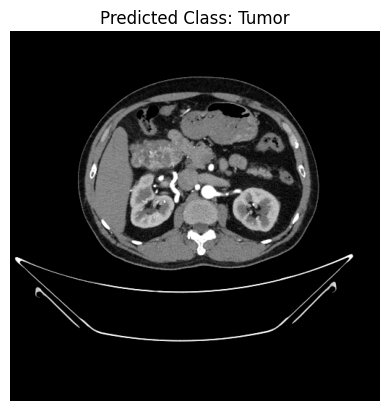

In [1]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = load_model(r'C:\Users\riyaz\Documents\3-2\pj_pranay\KD\kidney_disease_classifier_v2.h5')

def preprocess_image(image_path, target_size=(128, 128)):
    """
    Preprocess the image for prediction.
    Args:
        image_path (str): Path to the image file.
        target_size (tuple): Target size for resizing the image.
    Returns:
        np.array: Preprocessed image.
    """
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not found at path: {image_path}")
    
    img = cv2.resize(img, target_size)
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def predict_image_class(image_path, model):
    """
    Predict the class label for the given image.
    Args:
        image_path (str): Path to the image file.
        model: Trained model.
    Returns:
        str: Predicted class label.
    """
    img = preprocess_image(image_path)
    predictions = model.predict(img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    
    # Make sure this label map matches your model training order
    class_labels = {0: 'Cyst', 1: 'Normal', 2: 'Stone', 3: 'Tumor'}
    return class_labels.get(predicted_class_index, "Unknown")

# Path to the test image
test_image_path = r"C:\Users\riyaz\Desktop\testtest.jpg"

# Predict the class label
predicted_label = predict_image_class(test_image_path, model)
print(f'Predicted Class: {predicted_label}')

# Display the image with the predicted label
test_image = cv2.imread(test_image_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)  # For matplotlib display
plt.imshow(test_image)
plt.title(f'Predicted Class: {predicted_label}')
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 41ms/step


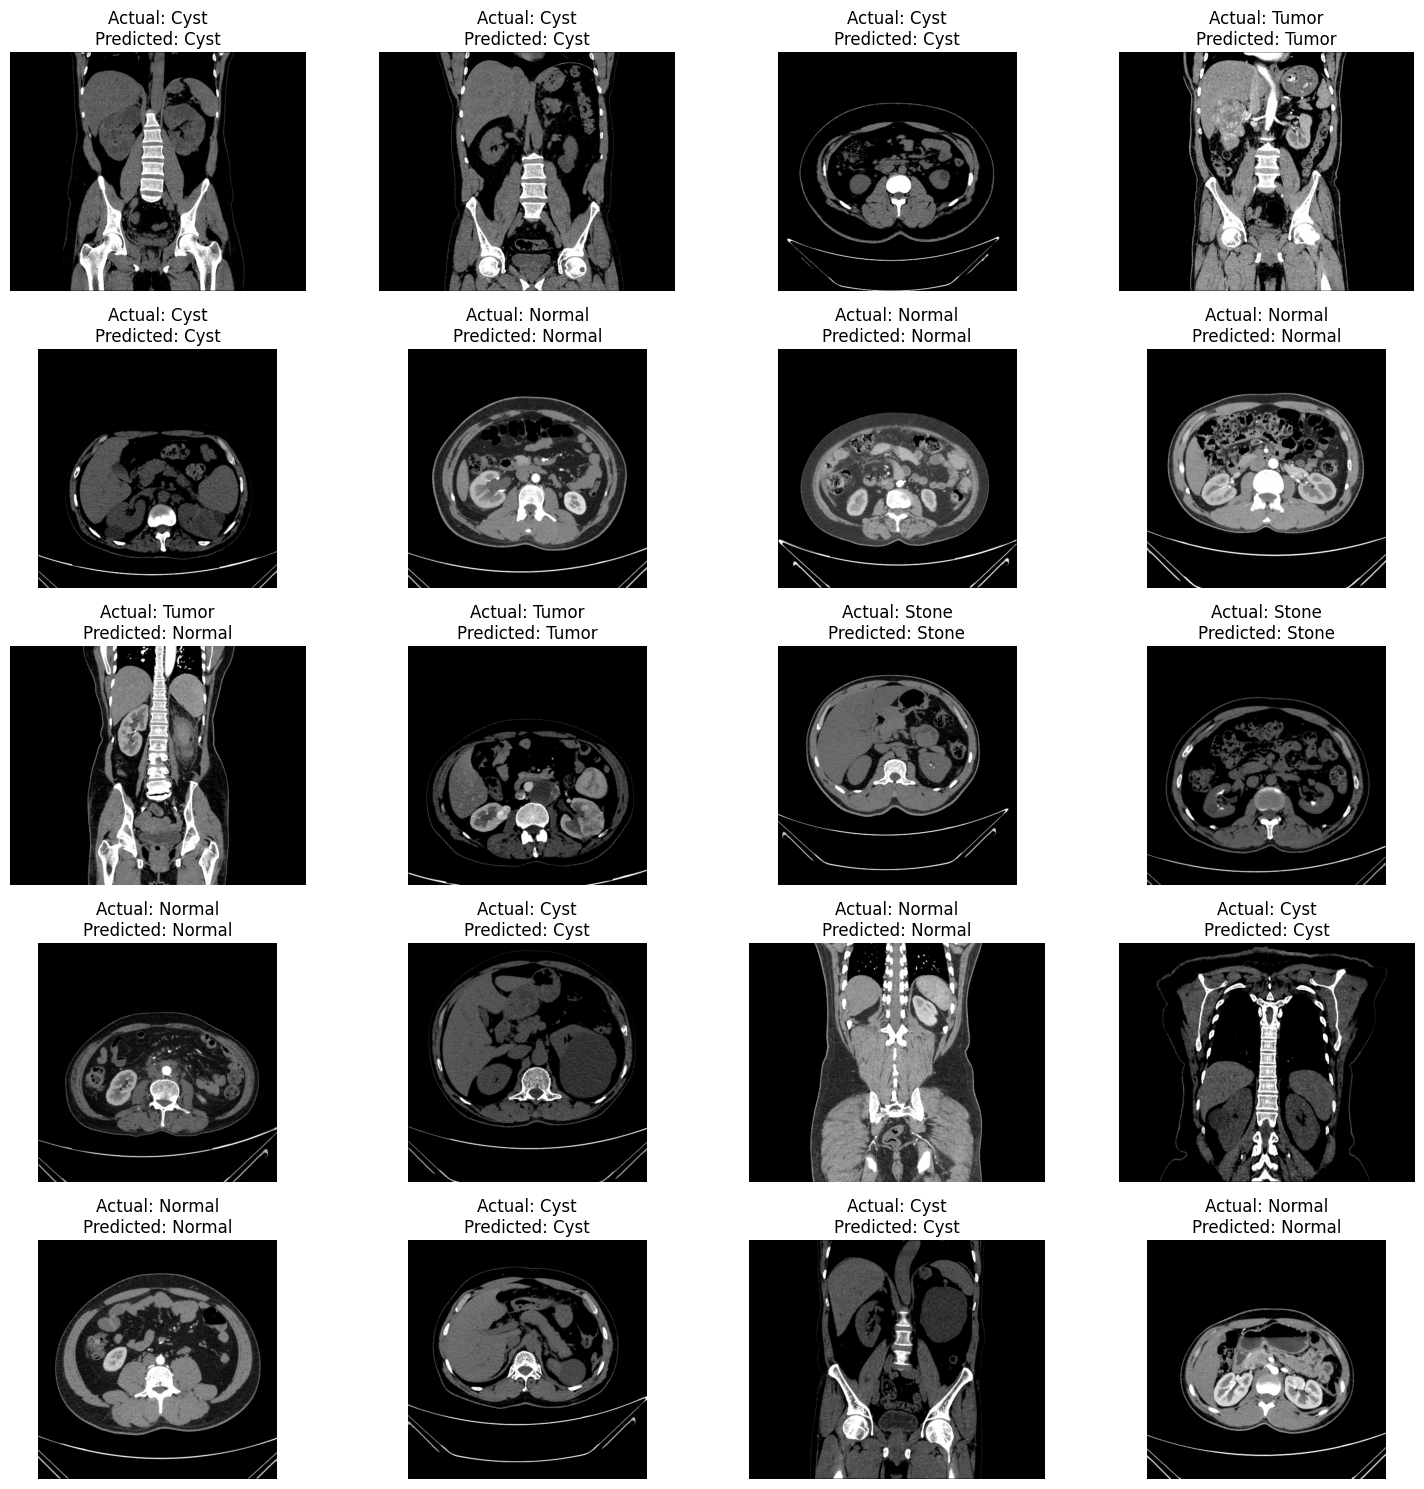

In [5]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model(r'C:\Users\riyaz\Documents\3-2\pj_pranay\KD\kidney_disease_classifier_v2.h5')

def preprocess_image(image_path, target_size=(128, 128)):
    """
    Preprocess the image for prediction.
    Args:
        image_path (str): Path to the image file.
        target_size (tuple): Target size for resizing the image.
    Returns:
        np.array: Preprocessed image.
    """
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not found at path: {image_path}")
    
    img = cv2.resize(img, target_size)
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def predict_image_class(image_path, model):
    """
    Predict the class label for the given image.
    Args:
        image_path (str): Path to the image file.
        model: Trained model.
    Returns:
        str: Predicted class label.
    """
    img = preprocess_image(image_path)
    predictions = model.predict(img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    
    # Make sure this label map matches your model training order
    class_labels = {0: 'Cyst', 1: 'Normal', 2: 'Stone', 3: 'Tumor'}
    return class_labels.get(predicted_class_index, "Unknown")

# Dataset path
dataset_path = r'C:/Users/riyaz/.cache/kagglehub/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/versions/1/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'

# List all image files in the dataset and subdirectories
image_files = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):
            image_files.append(os.path.join(root, file))

# If no image files are found, raise an error
if not image_files:
    raise ValueError(f"No image files found in the specified directory: {dataset_path}")

# Generate 20 random images with actual and predicted labels
sample_images = np.random.choice(image_files, 20, replace=False)

# Plot 20 images with their actual and predicted labels
plt.figure(figsize=(15, 15))

for i, image_path in enumerate(sample_images):
    # Extract actual label from the directory name (e.g., "Normal", "Cyst", etc.)
    actual_label = os.path.basename(os.path.dirname(image_path))
    
    # Predict the class label
    predicted_label = predict_image_class(image_path, model)

    # Read and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for plotting
    
    plt.subplot(5, 4, i + 1)
    plt.imshow(img)
    plt.title(f'Actual: {actual_label}\nPredicted: {predicted_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()
